
 ### **How Sleep and Screen Time Affect Grades in Children**

   ### This project explores how children's sleep hours and screen time are associated with their academic performance using survey data.

In [4]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv('nsch_2023_csv.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55162 entries, 0 to 55161
Columns: 456 entries, HEIGHT to FWC
dtypes: float64(452), int64(2), object(2)
memory usage: 191.9+ MB


#### Choosing only needed columnes 

In [6]:
selected_columns=data[['GRADES','BEDTIME','HOURSLEEP','BIRTH_YR','BORNUSA','SCREENTIME']]
selected_columns.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME
0,3.0,3.0,3.0,2011.0,1.0,4.0
1,1.0,1.0,5.0,2009.0,1.0,5.0
2,3.0,2.0,5.0,2006.0,1.0,4.0
3,2.0,2.0,5.0,2010.0,1.0,4.0
4,2.0,2.0,5.0,2012.0,1.0,5.0


In [47]:
#all rows are cleaned from Nan and duplicates
filtered_selected_columns=selected_columns.dropna(how='any').drop_duplicates()
filtered_selected_columns.head()


,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME
0,3.0,3.0,3.0,2011.0,1.0,4.0
1,1.0,1.0,5.0,2009.0,1.0,5.0
2,3.0,2.0,5.0,2006.0,1.0,4.0
3,2.0,2.0,5.0,2010.0,1.0,4.0
4,2.0,2.0,5.0,2012.0,1.0,5.0


In [48]:
filtered_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5412 entries, 0 to 55156
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GRADES      5412 non-null   float64
 1   BEDTIME     5412 non-null   float64
 2   HOURSLEEP   5412 non-null   float64
 3   BIRTH_YR    5412 non-null   float64
 4   BORNUSA     5412 non-null   float64
 5   SCREENTIME  5412 non-null   float64
dtypes: float64(6)
memory usage: 296.0 KB


#### Converting data types

In [8]:
def born_usa(number):
    if number==1:
        return 'Yes'
    return 'No'
    

In [9]:
filtered_selected_columns['BORNUSA'].apply(born_usa)


0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
55099    Yes
55109    Yes
55113     No
55152     No
55156     No
Name: BORNUSA, Length: 5412, dtype: object

In [10]:
filtered_selected_columns['BORNUSA']=filtered_selected_columns['BORNUSA'].apply(born_usa)

In [11]:
def bed_time(number):
    if number==1:
        return 'Always'
    elif number==2:
        return 'Usually'
    elif number==3:
        return 'Sometimes'
    elif number==4:
        return 'Rarely'
    elif number==5:
        return 'Never'

In [12]:
filtered_selected_columns['BEDTIME']=filtered_selected_columns['BEDTIME'].apply(bed_time)


In [53]:
filtered_selected_columns.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME
0,3.0,3.0,3.0,2011.0,1.0,4.0
1,1.0,1.0,5.0,2009.0,1.0,5.0
2,3.0,2.0,5.0,2006.0,1.0,4.0
3,2.0,2.0,5.0,2010.0,1.0,4.0
4,2.0,2.0,5.0,2012.0,1.0,5.0


In [54]:
filtered_selected_columns[['GRADES','HOURSLEEP','BIRTH_YR','SCREENTIME']]=filtered_selected_columns[['GRADES','HOURSLEEP','BIRTH_YR','SCREENTIME']].astype(int)
filtered_selected_columns.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME
0,3,3.0,3,2011,1.0,4
1,1,1.0,5,2009,1.0,5
2,3,2.0,5,2006,1.0,4
3,2,2.0,5,2010,1.0,4
4,2,2.0,5,2012,1.0,5


In [55]:
filtered_selected_columns['AGE']=2023-filtered_selected_columns['BIRTH_YR']
filtered_selected_columns.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME,AGE
0,3,3.0,3,2011,1.0,4,12
1,1,1.0,5,2009,1.0,5,14
2,3,2.0,5,2006,1.0,4,17
3,2,2.0,5,2010,1.0,4,13
4,2,2.0,5,2012,1.0,5,11


In [16]:
#we need only 6 to 18 years old.Let's filter it.
def sixth_and_older(number):
    if number>=6 :
        return True
    else:
        return False

In [17]:
filtered_selected_columns['AGE'].apply(sixth_and_older)
#mask=filtered_selected_columns['AGE'].apply(sixth_and_older)
#mask.value_counts()
filtered_selected_columns=filtered_selected_columns[filtered_selected_columns['AGE'].apply(sixth_and_older)]#such method works onlyl when we have booleans


In [56]:
filtered_selected_columns.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME,AGE
0,3,3.0,3,2011,1.0,4,12
1,1,1.0,5,2009,1.0,5,14
2,3,2.0,5,2006,1.0,4,17
3,2,2.0,5,2010,1.0,4,13
4,2,2.0,5,2012,1.0,5,11


In [19]:

filtered_selected_columns=filtered_selected_columns.dropna(subset=['GRADES'])


In [57]:
filtered_selected_columns.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME,AGE
0,3,3.0,3,2011,1.0,4,12
1,1,1.0,5,2009,1.0,5,14
2,3,2.0,5,2006,1.0,4,17
3,2,2.0,5,2010,1.0,4,13
4,2,2.0,5,2012,1.0,5,11


In [21]:
#Across all subjects, what grades did this child get during the 2022-2023 school year?
def grades(number):
    if number==1:
        return "Mostly A's"
    elif number==2:
        return "Mostly A's and B's"
    elif number==3:
        return "Mostly B's and C's"
    elif number==4:
        return "Mostly C's and D's"
    elif number==5:
        return "Mostly D's and lower"
    elif number==6:
        return "This child's school does not give these grades"
    

In [22]:
filtered_selected_columns['GRADES'].apply(grades)
#filtered_selected_columns


0                                    Mostly B's and C's
1                                            Mostly A's
2                                    Mostly B's and C's
3                                    Mostly A's and B's
4                                    Mostly A's and B's
                              ...                      
55099                                        Mostly A's
55109                              Mostly D's and lower
55113                                Mostly A's and B's
55152    This child's school does not give these grades
55156    This child's school does not give these grades
Name: GRADES, Length: 5217, dtype: object

In [23]:
filtered_selected_columns['GRADES']=filtered_selected_columns['GRADES'].apply(grades)

In [58]:
filtered_selected_columns.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME,AGE
0,3,3.0,3,2011,1.0,4,12
1,1,1.0,5,2009,1.0,5,14
2,3,2.0,5,2006,1.0,4,17
3,2,2.0,5,2010,1.0,4,13
4,2,2.0,5,2012,1.0,5,11


In [25]:
def hoursleep(number):
    if number==1:
        return 6 
    elif number==2:
        return 7 
    elif number==3:
        return 8 
    elif number==4:
        return 9 
    elif number==5:
        return 10
    elif number==6:
        return 11 
    elif number==7:
        return 12 

In [26]:
filtered_selected_columns['HOURSLEEP'].apply(hoursleep)

0         8
1        10
2        10
3        10
4        10
         ..
55099    10
55109     7
55113     8
55152    10
55156     9
Name: HOURSLEEP, Length: 5217, dtype: int64

In [27]:
filtered_selected_columns['HOURSLEEP']=filtered_selected_columns['HOURSLEEP'].apply(hoursleep)


In [59]:
filtered_selected_columns.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME,AGE
0,3,3.0,3,2011,1.0,4,12
1,1,1.0,5,2009,1.0,5,14
2,3,2.0,5,2006,1.0,4,17
3,2,2.0,5,2010,1.0,4,13
4,2,2.0,5,2012,1.0,5,11


In [29]:
filtered_selected_columns['SCREENTIME']=selected_columns['SCREENTIME']
filtered_selected_columns['SCREENTIME']=filtered_selected_columns['SCREENTIME'].astype(int)

In [60]:
filtered_selected_columns['SCREENTIME'].value_counts(dropna=False)
print(filtered_selected_columns['SCREENTIME'].isna())

0        False
1        False
2        False
3        False
4        False
         ...  
55099    False
55109    False
55113    False
55152    False
55156    False
Name: SCREENTIME, Length: 5412, dtype: bool


In [31]:
# ON MOST WEEKDAYS, about how much time did this child spend in front of a TV, computer, cellphone or 
#other electronic device watching programs, playing games, accessing the internet or using social media?

In [32]:
def screentime(number):
    if number == 1:
        return  0
    elif number == 2:
        return 1 
    elif number == 3:
        return 2 
    elif number == 4:
        return 3
    elif number == 5:
        return 4 
    


In [33]:
filtered_selected_columns['SCREENTIME'].apply(screentime)
#filtered_selected_columns

0        3
1        4
2        3
3        3
4        4
        ..
55099    4
55109    4
55113    0
55152    3
55156    2
Name: SCREENTIME, Length: 5217, dtype: int64

In [34]:
filtered_selected_columns['SCREENTIME']=filtered_selected_columns['SCREENTIME'].apply(screentime)


In [35]:
filtered_selected_columns=filtered_selected_columns.reset_index(drop=True)

In [61]:
filtered_selected_columns.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME,AGE
0,3,3.0,3,2011,1.0,4,12
1,1,1.0,5,2009,1.0,5,14
2,3,2.0,5,2006,1.0,4,17
3,2,2.0,5,2010,1.0,4,13
4,2,2.0,5,2012,1.0,5,11


In [62]:
filtered_selected_columns.describe(include='all')


,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME,AGE
count,5412.0,5412.0,5412.0,5412.0,5412.0,5412.0,5412.0
mean,2.9,2.2,4.3,2010.9,1.2,3.5,12.1
std,1.7,1.1,1.5,4.0,0.4,1.3,4.0
min,1.0,1.0,1.0,2005.0,1.0,1.0,0.0
25%,2.0,1.0,3.0,2008.0,1.0,3.0,9.0
50%,2.0,2.0,4.0,2011.0,1.0,4.0,12.0
75%,4.0,3.0,5.0,2014.0,1.0,5.0,15.0
max,6.0,5.0,7.0,2023.0,2.0,5.0,18.0


#### Count average sleep and screen time by grades

In [37]:
grades_groups=filtered_selected_columns.groupby('GRADES')
grades_groups.size()

GRADES
Mostly A's                                        1286
Mostly A's and B's                                1385
Mostly B's and C's                                 974
Mostly C's and D's                                 531
Mostly D's and lower                               259
This child's school does not give these grades     782
dtype: int64

In [38]:
pd.set_option('display.precision',1)

In [39]:
average_hours=grades_groups[['HOURSLEEP','SCREENTIME']].mean()
average_hours

,HOURSLEEP,SCREENTIME
GRADES,,
Mostly A's,9.4,2.3
Mostly A's and B's,9.3,2.4
Mostly B's and C's,9.1,2.6
Mostly C's and D's,8.9,2.8
Mostly D's and lower,8.9,3.1
This child's school does not give these grades,9.5,2.4


In [40]:
import matplotlib.pyplot as plt

In [41]:
plt.style.use('dark_background')

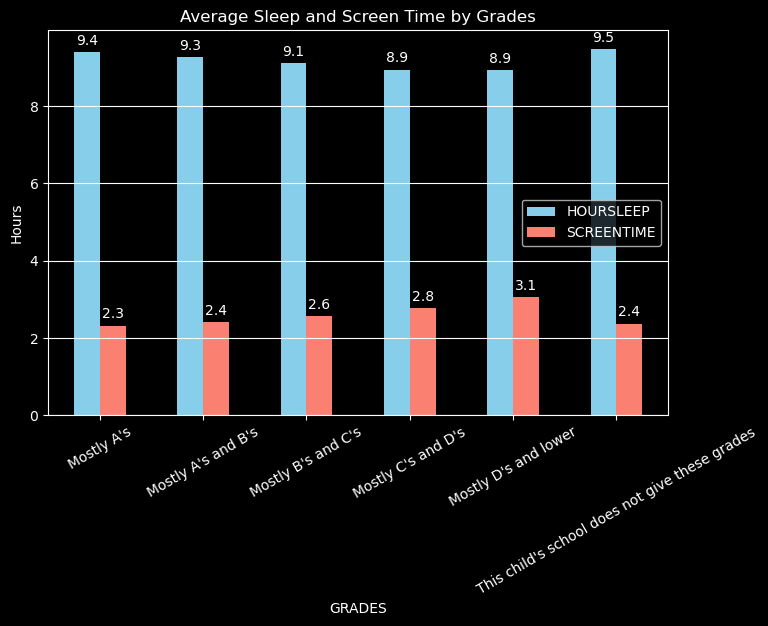

In [42]:
ax=average_hours.plot(kind='bar',figsize=(8,5), color=['skyblue', 'salmon'])
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f', padding=3)
plt.title('Average Sleep and Screen Time by Grades')
plt.ylabel('Hours')
plt.xticks(rotation=30)
plt.grid(axis='y')
#plt.tight_layout()
plt.show()

### **Conclusion:** 

#### The chart reveals a clear pattern: students with higher average hours of sleep and lower screen time tend to achieve better grades. For example, those with 'Mostly A's' have the highest sleep duration and the lowest screen time compared to students with lower grade categories. In contrast, as sleep decreases and screen time increases, average grades tend to decline.

#### Count average sleep and screen time by age

In [43]:
ages=filtered_selected_columns.groupby('AGE')
ages.size()

AGE
6     261
7     365
8     372
9     355
10    385
11    402
12    397
13    420
14    454
15    467
16    491
17    510
18    338
dtype: int64

In [44]:
ages_group=ages[['HOURSLEEP','SCREENTIME']].mean()
ages_group

,HOURSLEEP,SCREENTIME
AGE,,
6,9.8,2.1
7,9.6,2.1
8,9.7,2.2
9,9.7,2.2
10,9.6,2.3
11,9.4,2.4
12,9.3,2.5
13,9.2,2.5
14,9.2,2.7


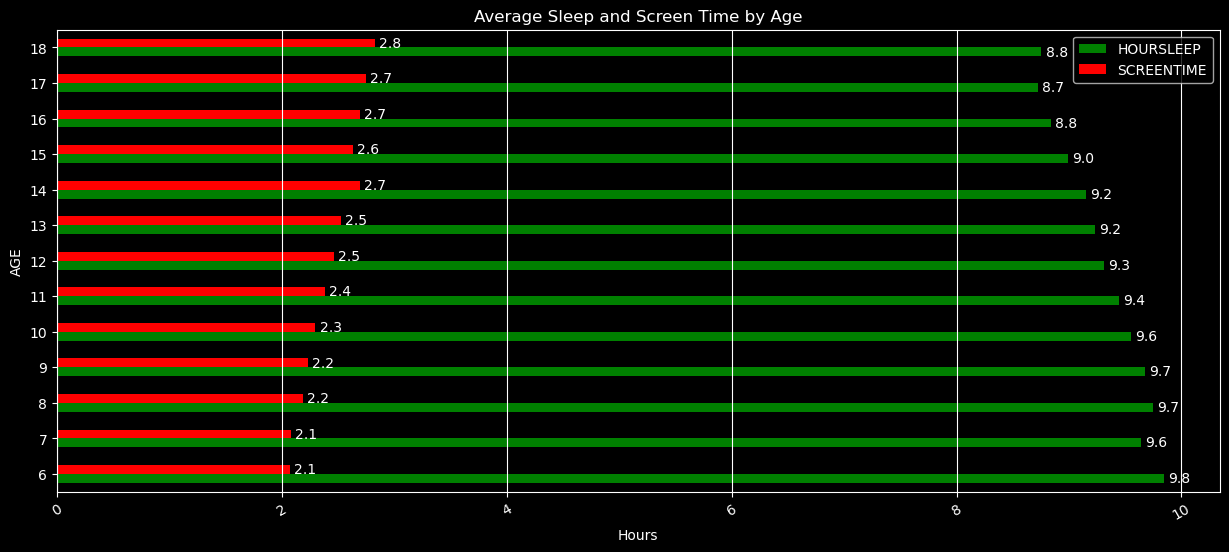

In [45]:
ax=ages_group.plot(kind='barh',figsize=(15,6),color=['green','red'])
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f',padding=3)
plt.title('Average Sleep and Screen Time by Age')
plt.xlabel('Hours')
plt.grid(axis='x')
plt.xticks(rotation=30)
plt.show()

### **Conclusion:**

#### The chart shows that younger children tend to sleep longer and have less screen time compared to older children. As age increases, both the average hours of sleep decrease and screen time increases.

In [46]:
ages.get_group(17)[['HOURSLEEP','SCREENTIME']].mean()# this code confirms that the previous calculation(cell 212) is correct

HOURSLEEP     8.7
SCREENTIME    2.7
dtype: float64